VGRF : Vertical Ground Reaction Force

Co : Control Object

Pt: Patient

Euc : Euclidean

TWED : Time-warped edit distance

DTW : Dynamic Time Wrapping

EDR : Edit Distance on Real sequences


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from get_similarities import get_similarity_euc, get_similarity_edr , get_similarity_dtw, get_similarity_twed
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix

from collections import Counter
%matplotlib notebook


"""Data visualization"""

In [17]:
#read data from A healthy person and a person with Parkinson
healthy_person = pd.read_csv('dataset/GaCo06_01.csv') #Control Object - healthy person DATA
patient_person = pd.read_csv('dataset/GaPt03_01.csv') #Patient DATA
print("8 sensors for Left leg and 8 sensors for right leg")
healthy_person.head()


8 sensors for Left leg and 8 sensors for right leg


,Time(sec),VGRF_left_s1,VGRF_left_s2,VGRF_left_s3,VGRF_left_s4,VGRF_left_s5,VGRF_left_s6,VGRF_left_s7,VGRF_left_s8,VGRF_right_s1,VGRF_right_s2,VGRF_right_s3,VGRF_right_s4,VGRF_right_s5,VGRF_right_s6,VGRF_right_s7,VGRF_right_s8,Total_force_left,Total_force_right
0,0.01,4.07,11.22,15.73,180.18,219.67,217.03,301.18,45.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,994.18,0.0
1,0.02,0.00,7.48,9.79,182.38,217.47,226.27,310.20,47.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.89,0.0
2,0.03,0.00,3.74,7.81,180.18,215.27,233.09,319.33,47.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1006.72,0.0
3,0.04,0.00,3.74,5.83,176.00,208.67,244.64,328.35,47.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1014.53,0.0
4,0.05,0.00,0.00,5.83,167.53,199.87,251.57,337.48,47.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1009.58,0.0


<IPython.core.display.Javascript object>


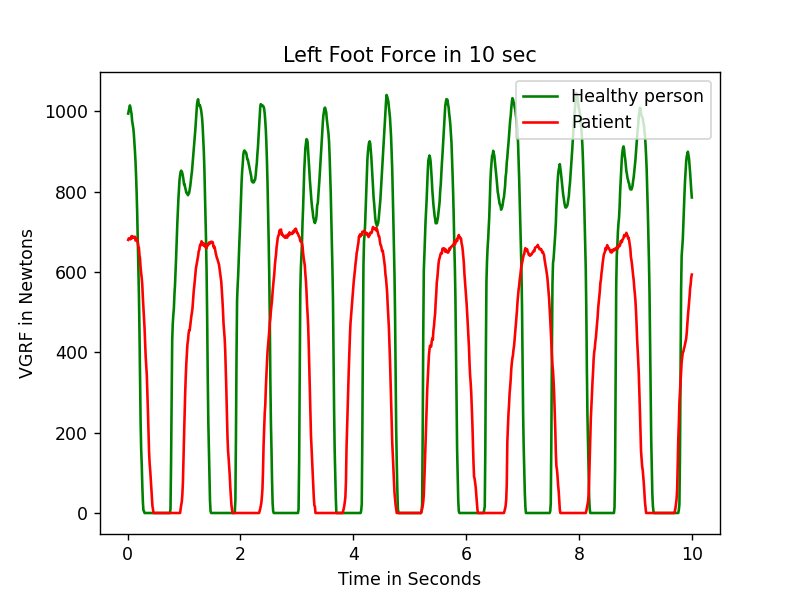

Text(0.5, 1.0, 'Left Foot Force in 10 sec')

In [18]:
#visualize the left leg Force and compare between Healthy person and a patient
plt.figure()
plt.plot(healthy_person.head(1000)['Time(sec)'], healthy_person.head(1000)['Total_force_left'], label="Healthy person",color='g')
plt.plot(patient_person.head(1000)['Time(sec)'], patient_person.head(1000)['Total_force_left'], label="Patient",color='r')
plt.legend(loc=1)
plt.xlabel("Time in Seconds")
plt.ylabel("VGRF in Newtons")
plt.title("Left Foot Force in 10 sec")


<IPython.core.display.Javascript object>


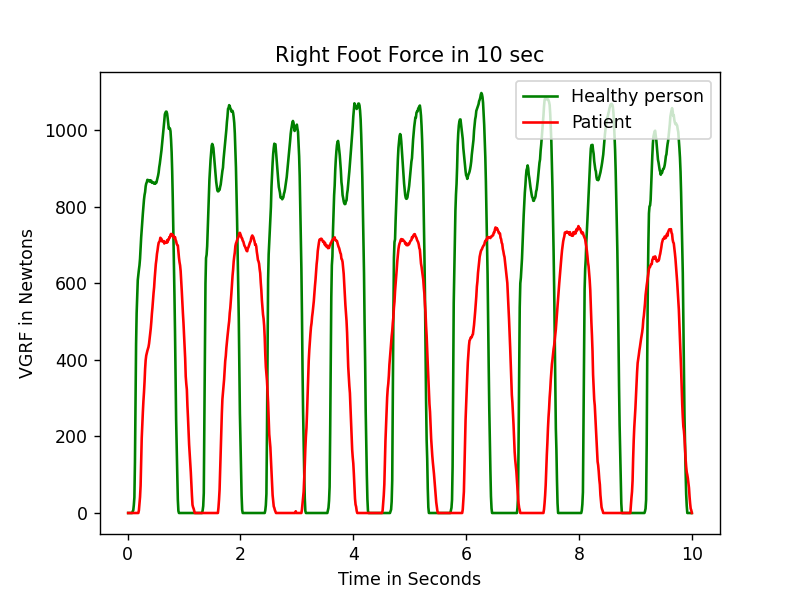

Text(0.5, 1.0, 'Right Foot Force in 10 sec')

In [19]:
#visualize the right leg Force and compare between Healthy person and a patient
plt.figure()
plt.plot(healthy_person.head(1000)['Time(sec)'], healthy_person.head(1000)['Total_force_right'], label="Healthy person", color='g')
plt.plot(patient_person.head(1000)['Time(sec)'], patient_person.head(1000)['Total_force_right'], label="Patient", color ='r')
plt.legend(loc=1)
plt.xlabel("Time in Seconds")
plt.ylabel("VGRF in Newtons")
plt.title("Right Foot Force in 10 sec")


<IPython.core.display.Javascript object>


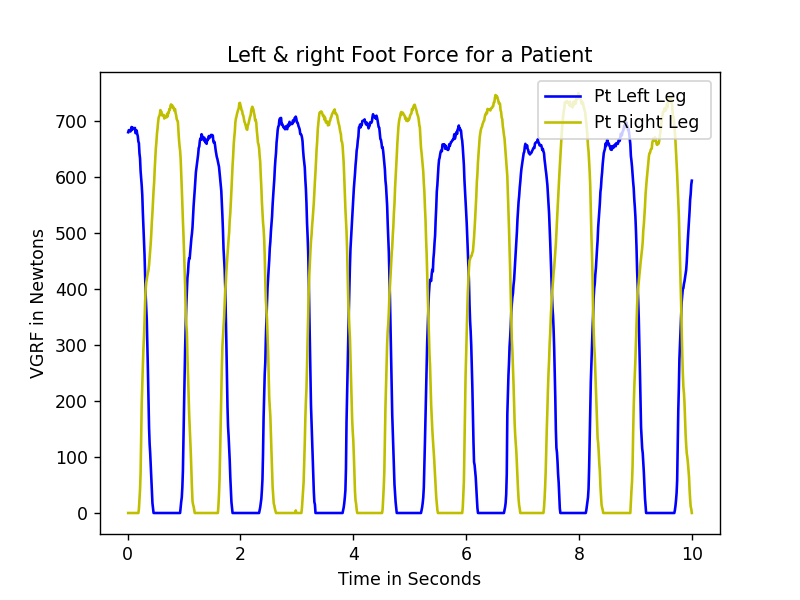

Text(0.5, 1.0, 'Left & right Foot Force for a Patient')

In [20]:
#visualize the left leg Force and compare between Healthy person and a patient
plt.figure()
plt.plot(patient_person.head(1000)['Time(sec)'], patient_person.head(1000)['Total_force_left'], label="Pt Left Leg",color='b')
plt.plot(patient_person.head(1000)['Time(sec)'], patient_person.head(1000)['Total_force_right'], label="Pt Right Leg ",color='y')
plt.legend(loc=1)
plt.xlabel("Time in Seconds")
plt.ylabel("VGRF in Newtons")
plt.title("Left & right Foot Force for a Patient")


<IPython.core.display.Javascript object>


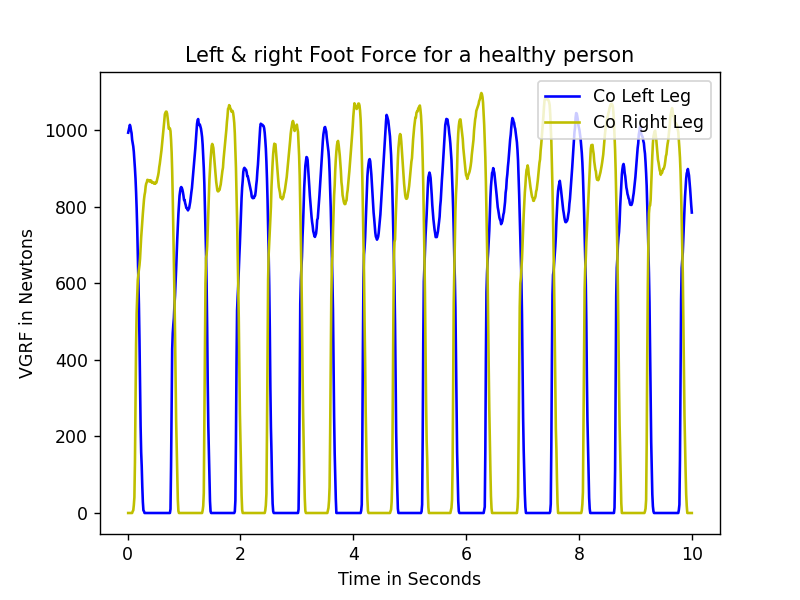

Text(0.5, 1.0, 'Left & right Foot Force for a healthy person')

In [21]:
#visualize the left leg Force and compare between Healthy person and a patient
plt.figure()
plt.plot(healthy_person.head(1000)['Time(sec)'], healthy_person.head(1000)['Total_force_left'], label="Co Left Leg",color='b')
plt.plot(healthy_person.head(1000)['Time(sec)'], healthy_person.head(1000)['Total_force_right'], label="Co Right Leg",color='y')
plt.legend(loc=1)
plt.xlabel("Time in Seconds")
plt.ylabel("VGRF in Newtons")
plt.title("Left & right Foot Force for a healthy person")


"""Merging Data"""

In [8]:
#we need to extract Co data  =  healthy person data   (Co = Control Object)
#and merge them all together

files = []
for name in os.listdir('dataset'):
    if 'Co' in name:
        files.append('dataset/' + name)
        
i = 0    
path = 'merged_dataset/healthy_person_data_merged.csv'
with open(path, 'a') as output:
    for name in files:
        with open(name) as input_:
            if i == 0: 
                for line in input_:
                    output.write(line)
            else:
                next(input_)
                for line in input_:
                    output.write(line)
            i += 1
            print('{} files merged together'.format(i))



1 files merged together
2 files merged together
3 files merged together
4 files merged together
5 files merged together
6 files merged together
7 files merged together
8 files merged together
9 files merged together
10 files merged together
11 files merged together
12 files merged together
13 files merged together
14 files merged together
15 files merged together
16 files merged together
17 files merged together
18 files merged together
19 files merged together
20 files merged together
21 files merged together
22 files merged together
23 files merged together
24 files merged together
25 files merged together
26 files merged together
27 files merged together
28 files merged together
29 files merged together
30 files merged together
31 files merged together
32 files merged together
33 files merged together
34 files merged together
35 files merged together
36 files merged together
37 files merged together
38 files merged together
39 files merged together
40 files merged together
41 files 

In [9]:
#we need to extract Pt data  =  patient with parkinson    (Pt  = Patient)
#and merge them all together

files = []
for name in os.listdir('dataset'):
    if 'Pt' in name:
        files.append('dataset/' + name)
        
i = 0    
path = 'merged_dataset/patient_data_merged.csv'
with open(path, 'a') as output:
    for name in files:
        with open(name) as input_:
            if i == 0: 
                for line in input_:
                    output.write(line)
            else:
                next(input_)
                for line in input_:
                    output.write(line)
            i += 1
            print('{} files merged together'.format(i))



1 files merged together
2 files merged together
3 files merged together
4 files merged together
5 files merged together
6 files merged together
7 files merged together
8 files merged together
9 files merged together
10 files merged together
11 files merged together
12 files merged together
13 files merged together
14 files merged together
15 files merged together
16 files merged together
17 files merged together
18 files merged together
19 files merged together
20 files merged together
21 files merged together
22 files merged together
23 files merged together
24 files merged together
25 files merged together
26 files merged together
27 files merged together
28 files merged together
29 files merged together
30 files merged together
31 files merged together
32 files merged together
33 files merged together
34 files merged together
35 files merged together
36 files merged together
37 files merged together
38 files merged together
39 files merged together
40 files merged together
41 files 

In [22]:
Co_data = pd.read_csv("merged_dataset/healthy_person_data_merged.csv")
Co_data.head()

,Time(sec),VGRF_left_s1,VGRF_left_s2,VGRF_left_s3,VGRF_left_s4,VGRF_left_s5,VGRF_left_s6,VGRF_left_s7,VGRF_left_s8,VGRF_right_s1,VGRF_right_s2,VGRF_right_s3,VGRF_right_s4,VGRF_right_s5,VGRF_right_s6,VGRF_right_s7,VGRF_right_s8,Total_force_left,Total_force_right
0,0.01,199.1,87.34,91.08,24.09,21.12,87.67,87.23,64.57,163.9,79.86,112.42,50.82,13.75,102.74,144.98,79.53,662.20,748.00
1,0.02,199.1,87.34,91.08,24.09,21.12,87.67,87.23,62.59,163.9,79.86,112.42,50.82,13.75,102.74,144.98,79.53,660.22,748.00
2,0.03,199.1,87.34,91.08,24.09,21.12,87.67,89.10,64.57,163.9,77.55,112.42,48.07,13.75,105.49,144.98,79.53,664.07,745.69
3,0.04,199.1,87.34,91.08,24.09,21.12,87.67,87.23,62.59,163.9,77.55,112.42,50.82,13.75,105.49,144.98,79.53,660.22,748.44
4,0.05,199.1,87.34,91.08,24.09,19.03,87.67,89.10,62.59,163.9,77.55,112.42,50.82,13.75,102.74,144.98,79.53,660.00,745.69


In [23]:
Pt_data = pd.read_csv("merged_dataset/patient_data_merged.csv")
Pt_data.head()

,Time(sec),VGRF_left_s1,VGRF_left_s2,VGRF_left_s3,VGRF_left_s4,VGRF_left_s5,VGRF_left_s6,VGRF_left_s7,VGRF_left_s8,VGRF_right_s1,VGRF_right_s2,VGRF_right_s3,VGRF_right_s4,VGRF_right_s5,VGRF_right_s6,VGRF_right_s7,VGRF_right_s8,Total_force_left,Total_force_right
0,0.01,71.72,174.90,135.96,83.38,30.14,64.57,84.04,35.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,679.91,0.0
1,0.02,71.72,173.25,134.31,84.92,31.68,64.57,87.78,35.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,683.43,0.0
2,0.03,68.53,169.84,132.55,86.46,31.68,67.43,87.78,39.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,683.87,0.0
3,0.04,65.34,168.19,132.55,86.46,31.68,67.43,91.52,39.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,682.77,0.0
4,0.05,62.15,165.00,129.03,88.11,31.68,70.40,95.26,39.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,681.23,0.0


In [24]:
print("lenght of Control Object Data",len(Co_data))
print("lenght of Patient Data",len(Pt_data))

lenght of Control Object Data 1012740
lenght of Patient Data 2304504


""" 
finding the ideal threshold to split between cycles for each leg 
"""

In [25]:
Co_VGRF_left = Co_data['Total_force_left']
Co_VGRF_right = Co_data['Total_force_right']

Pt_VGRF_left = Pt_data['Total_force_left']
Pt_VGRF_right = Pt_data['Total_force_right']

In [26]:
#we need to extract every cycle gait as a list of timeseries 

def extract_cycle_gait(index,VGRF,threshold_):
    '''
    input : 
        index : from which we will start saving the gait 
        VGRF : the vector of timeseries that contains the Force gait in Newtons
        
        this function will extract one cycle gait by eliminating the Swing phase ( a phase in cycle gait which has VGRF less than 20 )
    '''
    
    cycle = []
    while VGRF[index] >threshold_  :  #if the value of VRGF is lower than 20 ; that means we are in swing phase where no Force is applied ; 20 is a threshold
       
        cycle.append(VGRF[index])
        index = index + 1
        if index == len(VGRF):
            return index, cycle

    while VGRF[index] <= threshold_ and index < len(VGRF) :
            index = index + 1 
            if index == len(VGRF):
                return index, cycle
    return index, cycle
    # will return the timeseries of one cycle and the index from which we will look for the next cycle

In [27]:
#we run a test to find the threshold to apply to split between Swing phase and Stance phase for the left and right Leg in order to get equal number of Cycle for both legs
def run_test_threshold(VGRF_left,VGRF_right):
    for threshold_left in range (30,60):
        for threshold_right in range (40,50):
            print("threshold left leg = {} and  threshold right leg = {}".format(threshold_left,threshold_right))
            index  = 0
            i = 0
            while index < len(VGRF_left) :
                i += 1
                index, cycle = extract_cycle_gait(index,VGRF_left,threshold_left)

            print("we have {} cycles for the left Leg ".format(i))
            index  = 0
            j = 0
            while index < len(VGRF_left) :
                j += 1
                index, cycle = extract_cycle_gait(index,VGRF_right,threshold_right)

            print("we have {} cycles for the right Leg".format(j))
            
    
            if j== i :
                break
        if j== i :
                break
    return threshold_left, threshold_right
        
print("Finding the threshold for healthy person right leg and left leg")
print("------")
Co_threshold_left, Co_threshold_right = run_test_threshold(Co_VGRF_left,Co_VGRF_right)
print("------")
print("Finding the threshold for the Patient right leg and left leg")
print("------")
Pt_threshold_left, Pt_threshold_right = run_test_threshold(Pt_VGRF_left,Pt_VGRF_right)

#so for healthy person, for the left leg we will apply a threshold = 33 and for right leg we will apply a threshold = 40
#so for Patient, for the left leg we will apply a threshold = 32 and for right leg we will apply a threshold = 44


Finding the threshold for healthy person right leg and left leg
------
threshold left leg = 30 and  threshold right leg = 40
we have 9249 cycles for the left Leg 
we have 9235 cycles for the right Leg
threshold left leg = 30 and  threshold right leg = 41
we have 9249 cycles for the left Leg 
we have 9229 cycles for the right Leg
threshold left leg = 30 and  threshold right leg = 42
we have 9249 cycles for the left Leg 
we have 9226 cycles for the right Leg
threshold left leg = 30 and  threshold right leg = 43
we have 9249 cycles for the left Leg 
we have 9226 cycles for the right Leg
threshold left leg = 30 and  threshold right leg = 44
we have 9249 cycles for the left Leg 
we have 9220 cycles for the right Leg
threshold left leg = 30 and  threshold right leg = 45
we have 9249 cycles for the left Leg 
we have 9222 cycles for the right Leg
threshold left leg = 30 and  threshold right leg = 46
we have 9249 cycles for the left Leg 
we have 9220 cycles for the right Leg
threshold left leg 